In [3]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from config import *
import input
import run_analysis

2.2514192569773304 2.251289089778646


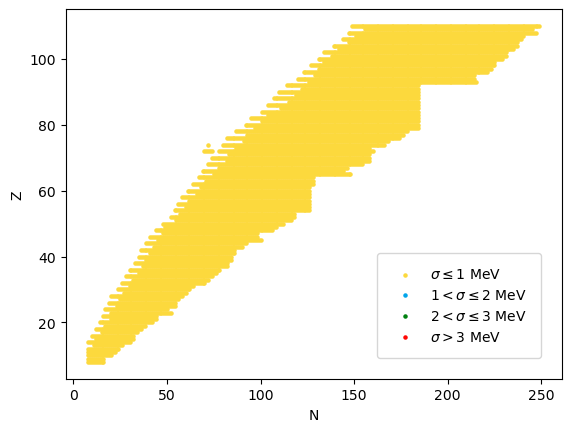

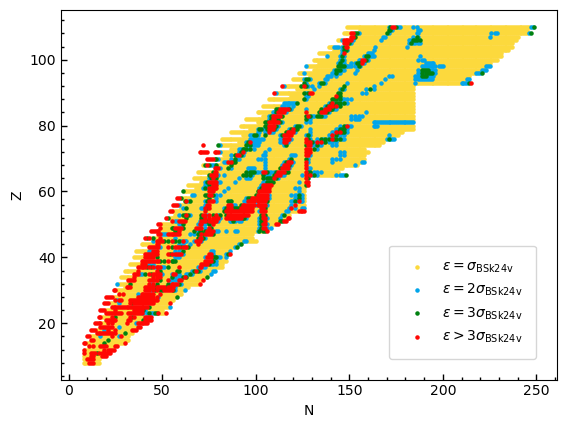

In [4]:
# Quick analysis on the trained ext data from 64 variants
mt = run_analysis.main(
    "data/output/Test 64 varians w 0.2% sample each on exp mass predict 256 random ext samples, full mass table.dat"
)

In [12]:
mass_table = pd.read_csv(
    "data/output/Test 64 varians w 0.2% sample each on exp mass predict 256 random ext samples, full mass table.dat",
    sep=";",
)

_, bsk24 = input.data.load_data("default")
mass_table

,Z,N,BSk24,Prediction,Difference
0,8.0,8.0,-2.734515,11.018903,-13.753418
1,8.0,8.0,-2.734424,11.010472,-13.744896
2,8.0,8.0,-2.746296,11.010472,-13.756768
3,8.0,8.0,-2.750272,10.894619,-13.644891
4,8.0,8.0,-2.785978,10.967521,-13.753499
...,...,...,...,...,...
1644795,110.0,249.0,552.836900,547.419070,5.417833
1644796,110.0,249.0,551.331100,547.419070,3.912033
1644797,110.0,249.0,555.673700,547.420300,8.253412
1644798,110.0,249.0,550.427200,547.420300,3.006912


Tested nucleus: N=83.0 & Z=71.0
BSk24 Prediction: -39.34 MeV


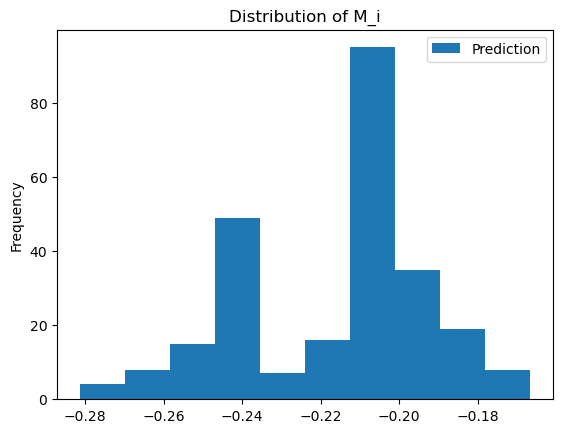

In [25]:
random_variant = random.randint(0, len(mass_table["Z"]))
N_test = mass_table.iloc[random_variant]["N"]
Z_test = mass_table.iloc[random_variant]["Z"]

test_bsk24 = bsk24[(bsk24["N"] == N_test) & (bsk24["Z"] == Z_test)]["m"].iloc[0]
test_nucleus = (
    mass_table[(mass_table["N"] == N_test) & (mass_table["Z"] == Z_test)] - test_bsk24
)
print(f"Tested nucleus: N={N_test} & Z={Z_test}")
print(f"BSk24 Prediction: {test_bsk24} MeV")

test_nucleus["Prediction"].plot(kind="hist")
plt.title("Distribution of M_i")

plt.legend()

Text(0, 0.5, 'Z')

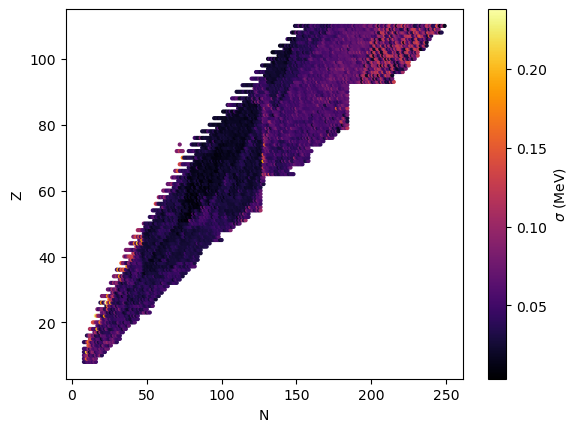

In [21]:
aggregated = mass_table.groupby(["Z", "N"]).agg({"Prediction": ["mean", "std"]})
aggregated.columns = ["m_mean", "m_std"]
aggregated = aggregated.reset_index()
scatter = plt.scatter(
    aggregated["N"], aggregated["Z"], c=aggregated["m_std"], cmap="inferno", s=4
)
plt.colorbar(scatter, label=r"$\sigma$ (MeV)")
plt.xlabel("N")
plt.ylabel("Z")